## Test the best constant for generating random covariane matrices

In [2]:
from data import *

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
G = generate_random_dag(50, 3, seed=123)

In [4]:
X, cov, cov_prev = generate_linear_sem_correlated(G, 1000, 0.5, seed=123, return_cov=True)

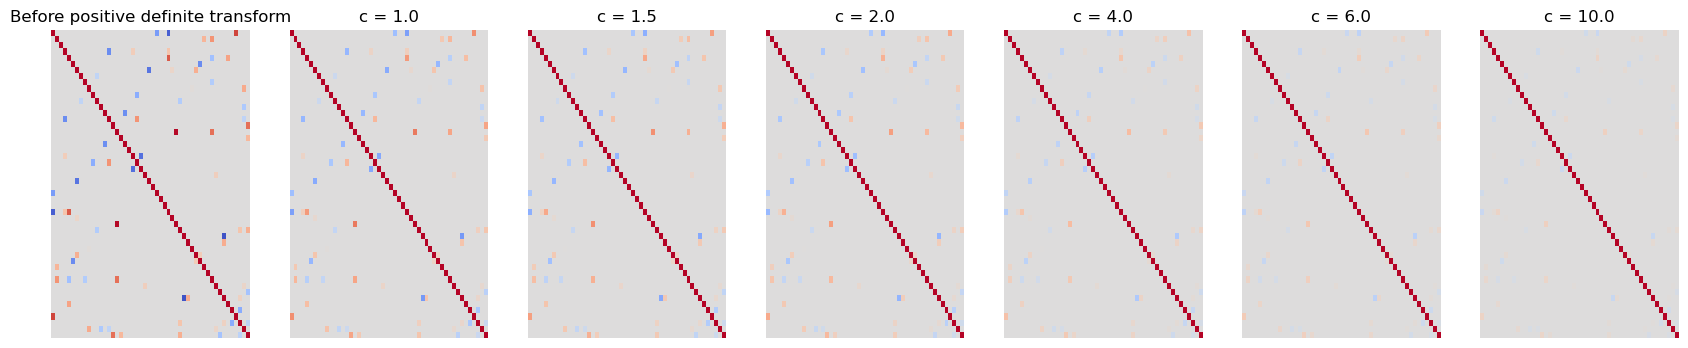

In [7]:
fig, axes = plt.subplots(1, 7, figsize=(21, 4))

sns.heatmap(cov_prev, ax=axes[0], cmap='coolwarm', vmin=-1, vmax=1)
axes[0].set_title('Before positive definite transform')
axes[0].collections[0].colorbar.remove()
axes[0].axis('off')

for idx, c in enumerate([1.0, 1.5, 2.0, 4.0, 6.0, 10.0]):
    X, cov, cov_prev = generate_linear_sem_correlated(G, 1000, 0.5, seed=123, return_cov=True, const=c)
    sns.heatmap(cov, ax=axes[idx+1], cmap='coolwarm', vmin=-1, vmax=1)
    axes[idx+1].set_title(f'c = {c}')
    # remove the colorbar
    axes[idx+1].collections[0].colorbar.remove()
    # remove the axis
    axes[idx+1].axis('off')


plt.savefig('plots/const_psd_transform.png', dpi=300, bbox_inches='tight', facecolor='white')